---
## Problem Statement :
* This competition challenges you to predict the final price of each home.
* Limited by Linear regression with Regularization.

### Data fields

* MSSubClass: Identifies the type of dwelling involved in the sale.
* MSZoning: Identifies the general zoning classification of the sale.
* LotFrontage: Linear feet of street connected to property
* LotArea: Lot size in square feet
* Street: Type of road access to property
* Alley: Type of alley access to property
* LotShape: General shape of property
* LandContour: Flatness of the property
* Utilities: Type of utilities available
* LotConfig: Lot configuration
* LandSlope: Slope of property
* Neighborhood: Physical locations within Ames city limits
* Condition1: Proximity to various conditions
* Condition2: Proximity to various conditions (if more than one is present)
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* ... rest in the data description txt file

### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#---------- configs
pd.set_option('max_rows',100)
pd.set_option('max_columns',100)

In [3]:
### loading data
df_train = pd.read_csv(r"../input/house-prices-advanced-regression-techniques/train.csv",index_col=0)
df_test = pd.read_csv(r"../input/house-prices-advanced-regression-techniques/test.csv",index_col=0)
df_all = pd.concat([df_train,df_test],axis=0) #to handle data processing in one call

def get_train_test_df(all_df,train_length=len(df_train)):
    cpy_all_df = all_df.copy()
    return cpy_all_df.loc[:train_length], cpy_all_df.loc[train_length+1:]

### display data types and get a hint on NaNs.
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

In [4]:
df_train_prep,df_test_prep = get_train_test_df(df_all,train_length=len(df_train))

### Visualize Missing Values for each feature 
* [Test And Train] are seperated for better visualization

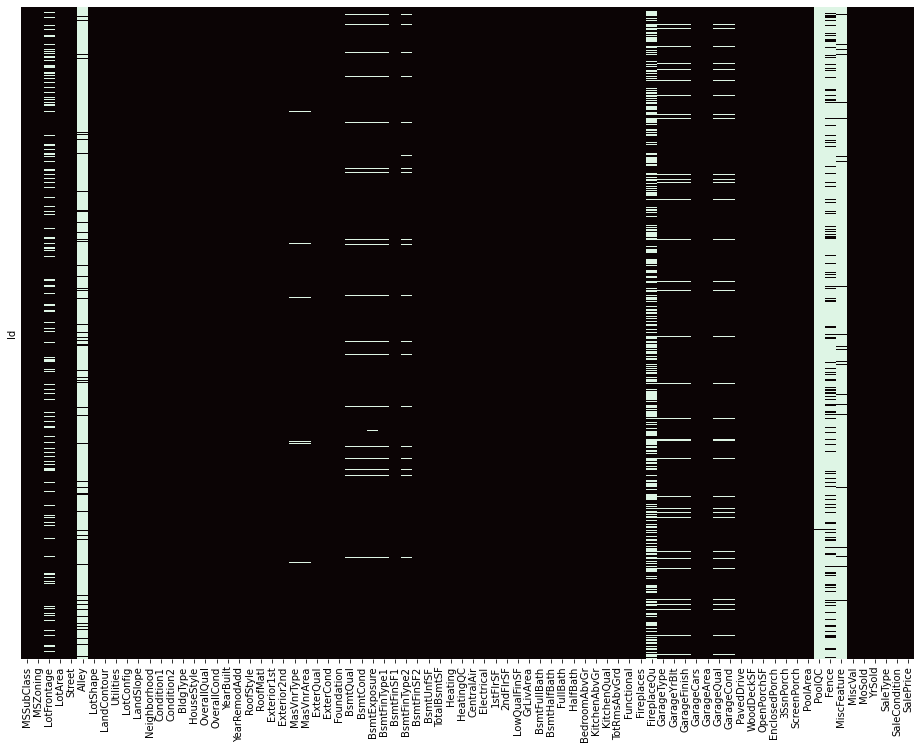

In [5]:
plt.figure(figsize=(16,12))
sns.heatmap(df_train_prep.isna(),yticklabels=False,cbar=False,cmap='mako')
plt.show()

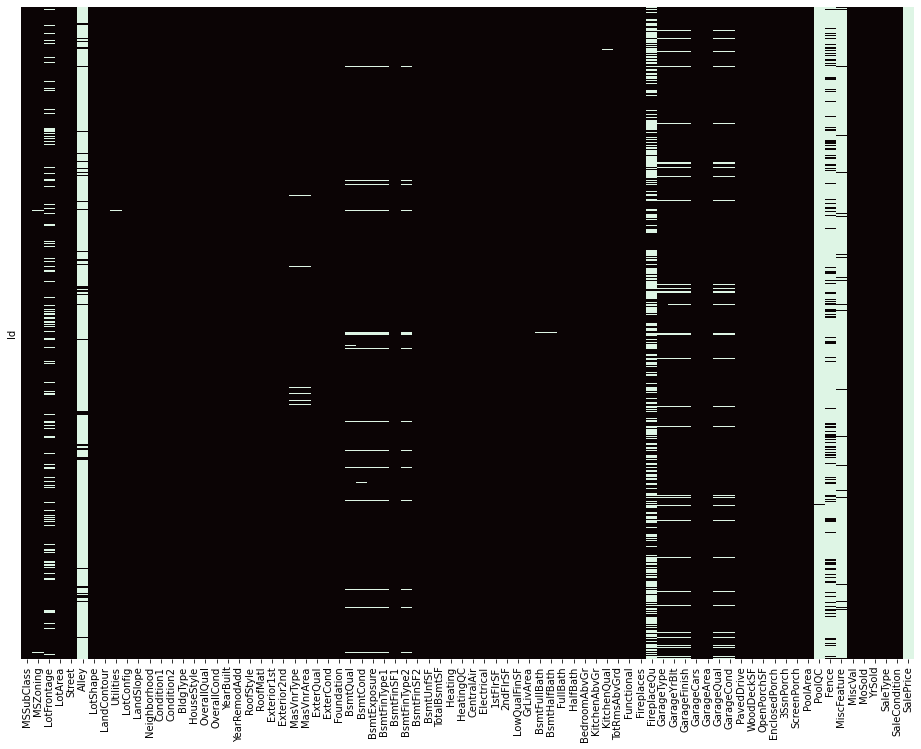

In [6]:
plt.figure(figsize=(16,12))
sns.heatmap(df_test_prep.isna(),yticklabels=False,cbar=False,cmap='mako')
plt.show()

### Percentage of Missing Values for each feature  (%) in All Data

In [7]:
features_na = (df_all.drop(columns=['SalePrice'],axis=1).isna().sum() / len(df_all) ) * 100
print('N of Features with Missing Values : ' , len(features_na[features_na > 0]))
print('Percentage of Missing Values for each feature  (%): ')
print(features_na[features_na > 0].sort_values(ascending = False))

N of Features with Missing Values :  34
Percentage of Missing Values for each feature  (%): 
PoolQC          99.657417
MiscFeature     96.402878
Alley           93.216855
Fence           80.438506
FireplaceQu     48.646797
LotFrontage     16.649538
GarageFinish     5.447071
GarageQual       5.447071
GarageCond       5.447071
GarageYrBlt      5.447071
GarageType       5.378554
BsmtExposure     2.809181
BsmtCond         2.809181
BsmtQual         2.774923
BsmtFinType2     2.740665
BsmtFinType1     2.706406
MasVnrType       0.822199
MasVnrArea       0.787941
MSZoning         0.137033
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
Functional       0.068517
Utilities        0.068517
GarageArea       0.034258
GarageCars       0.034258
Electrical       0.034258
KitchenQual      0.034258
TotalBsmtSF      0.034258
BsmtUnfSF        0.034258
BsmtFinSF2       0.034258
BsmtFinSF1       0.034258
Exterior2nd      0.034258
Exterior1st      0.034258
SaleType         0.034258
dtype: float64


---
### Summary of Missing Data
* we have 34 features with missing values 
    * (we will explore each one of them from the data description text file to see the reason why its missing!)
---
* PoolQC: Pool quality	: NA => No Pool
* MiscFeature: Miscellaneous feature not covered in other categories : NA => None
* Alley: NA => No alley access
* Fence : NA => No Fence     
* FireplaceQu : NA => No Fireplace
* **LotFrontage** : NA (no details on why its missing we will investigate it) maybe not having frontal connection to street?
---
* **GarageYrBlt**: NA (no details on why its missing we will investigate it) maybe no Garage.?
* GarageType,GarageFinish,GarageQual,GarageCond ,GarageType: NA => No Garage
* **GarageCars,GarageArea** = No Garage maybe?.
---
* BsmtFinType2,BsmtExposure,BsmtFinType1,BsmtCond,BsmtQual : NA => No Basement
* **BsmtFullBath ,BsmtHalfBath** : no details but there might be no bathroom in basement?
* **TotalBsmtSF : no basement?**
* **BsmtFinSF1, BsmtFinSF2, BsmtUnfSF : no basement?** 
---
* MasVnrType : NA -> None
* **MasVnrArea** : no details about NA.
* **MSZoning** : no details about NA.
* **Utilities** :  no details about NA only 2 observations with missing values
* **Functional** :  no details about NA only 2 observations with missing values
* **Exterior2nd ,Exterior1st** : are the same missing observation.
* **SaleType** : no details about NA.
* **Electrical** : no details about NA.
* **KitchenQual** : no details about the NA.


--- 
### Investigate missing data ( not Having NA Definition in the data_description text file)

---
##### For GarageYrBlt , GarageCars, GarageArea
* Q: does the missing values mean no Garage?
* from GarageType we know NA means No Garage ,lets compare

In [8]:
df_all[df_all['GarageType'].isna()][['GarageYrBlt' , 'GarageCars', 'GarageArea']].sum()

GarageYrBlt    0.0
GarageCars     0.0
GarageArea     0.0
dtype: float64

* from the above result the observations with NA match with No Garage at the GarageType Column
* i will use 0 for GarageCars,Area , and might use oldest the GarageYrBlt instead of zero which may introduce new skewness to the distribution of GarageYrBlt.

* Feature idea to indicate if there is a Garage or not for that house !

---
##### For LotFrontage 
* Q: does it mean something having no lot frontage?
* Q: what is the Sale Price Distribution for a house with NA lotFrontage vs a house with lotFrontage?

In [9]:
#first differentiate the NA from the rest. (using the train data only to see distribution with saleprice)
def lotfrontage_NA(df):
     if pd.isna(df['LotFrontage']): #is na => 0
        return 'Is NA'
     else:
        return 'Is not NA'
df_train['LotFrontageNA']  = df_train[['LotFrontage']].apply(lotfrontage_NA,axis=1)

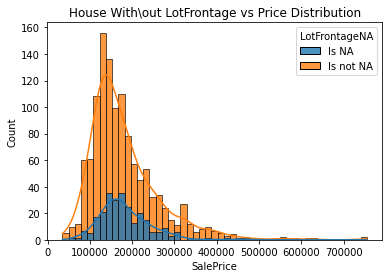

In [10]:
sns.histplot(data=df_train,x= 'SalePrice' ,hue='LotFrontageNA',kde=True ,hue_order=['Is NA','Is not NA'],alpha=0.8)
plt.title('House With\out LotFrontage vs Price Distribution')
plt.show()

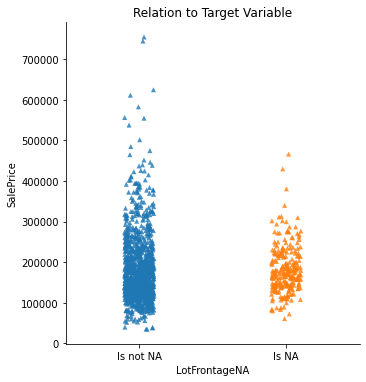

In [11]:
sns.catplot(data=df_train,x='LotFrontageNA',y='SalePrice',kind="strip",marker='^',alpha=0.8)
plt.title("Relation to Target Variable")
plt.show()

* from the above i think the **NA values** in the lot frontage has the same  target (SalePrice) distribution of the **non NA values** in the lot frontage and hence the missing values can be considered missing randomly.
* we can use methods of imputation like **median** since the distribution is right skewed.
* by reading great notebooks from this competition the idea of using the median from Neighborhood makes more sense to use.

---
##### For BsmtFullBath ,BsmtHalfBath ,TotalBsmtSF
* Q: does the missing values mean no Basement?
* using BsmtExposure(used because it has the highest percentage of missing) we know NA means No Basement ,lets compare..

In [12]:
df_all[df_all['BsmtExposure'].isna()][['BsmtFullBath' ,'BsmtHalfBath' ,'TotalBsmtSF']].sum()

BsmtFullBath       0.0
BsmtHalfBath       0.0
TotalBsmtSF     3256.0
dtype: float64

* from the above result the observations with NA match with No Basement at the BsmtExposure Column..
* except for TotalBsmtSF
* i will use 0 for BsmtFullBath,BsmtHalfBath with NA
* for TotalBsmtSF we need a better reason as to why

In [13]:
df_all[df_all['TotalBsmtSF'].isna()][['BsmtFullBath' ,'BsmtHalfBath' ,'BsmtExposure','BsmtFinType1','BsmtCond','BsmtQual']]

,BsmtFullBath,BsmtHalfBath,BsmtExposure,BsmtFinType1,BsmtCond,BsmtQual
Id,,,,,,
2121,NaN,NaN,NaN,NaN,NaN,NaN


* i think its safe to use 0 for TotalBsmtSF as apparently all basment values are 0!.

In [14]:
df_all[df_all['BsmtFinSF1'].isna()][['BsmtFinSF2', 'BsmtUnfSF','BsmtFullBath' ,'BsmtHalfBath' ,'BsmtExposure','BsmtFinType1','BsmtCond','BsmtQual']]

,BsmtFinSF2,BsmtUnfSF,BsmtFullBath,BsmtHalfBath,BsmtExposure,BsmtFinType1,BsmtCond,BsmtQual
Id,,,,,,,,
2121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* same for BsmtFinSF1, BsmtFinSF2, BsmtUnfSF use 0.

---
##### For MasVnrArea
* Q: does the missing values mean MasVnrType = None ?
* using MasVnrType.. we see

In [15]:
df_all[df_all['MasVnrType'].isna()][['MasVnrArea']]

,MasVnrArea
Id,
235,NaN
530,NaN
651,NaN
937,NaN
974,NaN
978,NaN
1244,NaN
1279,NaN
1692,NaN


* Yes all of them have no area but.. interestingly we find a suspicious value for an observation that is assumed to be 0 for record 2611 
* it makes no sense to have None Masonry vene but have an area for it. may be tried later..

In [16]:
df_all[df_all.index == 2611]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2611,20,RL,124.0,27697,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,4,3,1961,1961,Shed,CompShg,Plywood,Plywood,NaN,198.0,TA,TA,CBlock,TA,TA,No,BLQ,811.0,Unf,0.0,585.0,1396.0,GasA,TA,N,SBrkr,1608,0,0,1608,0.0,0.0,1,0,3,1,TA,6,Typ,0,NaN,Attchd,1961.0,Unf,1.0,444.0,TA,Fa,Y,152,38,0,0,0,0,NaN,NaN,NaN,0,11,2007,COD,Abnorml,NaN


---
##### For MSZoning
* Q: what about MSZoning ?

In [17]:
df_all[df_all['MSZoning'].isna()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1916,30,NaN,109.0,21780,Grvl,NaN,Reg,Lvl,NaN,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,2,4,1910,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Fa,Fa,CBlock,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,N,FuseA,810,0,0,810,0.0,0.0,1,0,1,1,TA,4,Min1,0,NaN,Detchd,1975.0,Unf,1.0,280.0,TA,TA,N,119,24,0,0,0,0,NaN,NaN,NaN,0,3,2009,ConLD,Normal,NaN
2217,20,NaN,80.0,14584,Pave,NaN,Reg,Low,AllPub,Inside,Mod,IDOTRR,Norm,Norm,1Fam,1Story,1,5,1952,1952,Gable,CompShg,AsbShng,VinylSd,None,0.0,Fa,Po,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,Wall,Po,N,FuseA,733,0,0,733,0.0,0.0,1,0,2,1,Fa,4,NaN,0,NaN,Attchd,1952.0,Unf,2.0,487.0,Fa,Po,N,0,0,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Abnorml,NaN
2251,70,NaN,NaN,56600,Pave,NaN,IR1,Low,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2.5Unf,5,1,1900,1950,Hip,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,686.0,686.0,GasA,Ex,Y,SBrkr,1150,686,0,1836,0.0,0.0,2,0,4,1,TA,7,Maj1,0,NaN,Detchd,1900.0,Unf,1.0,288.0,TA,Fa,N,0,0,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal,NaN
2905,20,NaN,125.0,31250,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Artery,Norm,1Fam,1Story,1,3,1951,1951,Gable,CompShg,CBlock,VinylSd,None,0.0,TA,Fa,CBlock,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,FuseA,1600,0,0,1600,0.0,0.0,1,1,3,1,TA,6,Mod,0,NaN,Attchd,1951.0,Unf,1.0,270.0,Fa,TA,N,0,0,135,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal,NaN


* i might use the most frequent MSZoning from Neighborhood like the lotfrontage idea.

---
##### For Utilities,Functional,Exterior1st ,Exterior2nd,SaleType,Electrical,KitchenQual
* these are 1 or 2 observations missing i will use the most frequent mostly for imputation.

---
## Data Preparation

#### From the Previous Section we investigated most of the missing data .. now i will apply the following...
* for all the data with NA description => will be filled with '_NONE_'
* for the rest :
    * use 0 for GarageCars,GarageArea , use oldest year built the GarageYrBlt
    * using the median from Neighborhood for LotFrontage NA.
    * use 0 for BsmtFullBath, BsmtHalfBath, TotalBsmtSF.
    * use 0 for MasVnrArea..
    * use most frequent MSZoning from Neighborhood for MSZoning.
    * use most frequent Utilities, Functional ,Exterior1st ,Exterior2nd,SaleType,Electrical,KitchenQual

#### Helper Functions

In [18]:
#get a copy for modification
df_all_prep = df_all.copy() 

In [19]:
#-- making modifications easier
def new_feature_data_series(df_prep,df_original,col_name,function,new_col_name):
       df_prep[new_col_name]  = df_original[col_name].apply(function,axis=1)

def encode_data_series(df_prep,df_original,col_name,from_vals,to_vals):
    df_prep[col_name] = df_original[col_name].replace(from_vals,to_vals,inplace=False)

* All data with NA Description

In [20]:
all_cols_with_NA = list(df_all_prep.isna().any()[df_all_prep.isna().any()].index) #get all NA Columns

all_categorical_cols = df_all_prep.select_dtypes('object').columns.tolist() #get Categorical NA Columns

exclude_cols = ['MSZoning','Utilities', 'Functional' ,'Exterior1st' ,'Exterior2nd','SaleType','Electrical','KitchenQual'] # for different treatment
all_na_cols_ready = [x for x in all_cols_with_NA if x in all_categorical_cols and x not in exclude_cols]

df_all_prep[all_na_cols_ready] = df_all_prep[all_na_cols_ready].fillna(value='_None_')

* Rest..

In [21]:
# GarageCars,GarageArea => 0 .. use oldest year built the GarageYrBlt
encode_data_series(df_all_prep,df_all,['GarageCars'],[np.nan],0)
encode_data_series(df_all_prep,df_all,['GarageArea'],[np.nan],0)
encode_data_series(df_all_prep,df_all,['GarageYrBlt'],[np.nan],df_train['GarageYrBlt'].min())

In [22]:
# using the median from Neighborhood for LotFrontage NA
df_all_prep["LotFrontage"] = df_all.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median())) 

In [23]:
# BsmtFullBath, BsmtHalfBath, TotalBsmtSF => 0
encode_data_series(df_all_prep,df_all,['BsmtFullBath'],[np.nan],0)
encode_data_series(df_all_prep,df_all,['BsmtHalfBath'],[np.nan],0)
encode_data_series(df_all_prep,df_all,['TotalBsmtSF'],[np.nan],0)

encode_data_series(df_all_prep,df_all,['BsmtFinSF1'],[np.nan],0)
encode_data_series(df_all_prep,df_all,['BsmtFinSF2'],[np.nan],0)
encode_data_series(df_all_prep,df_all,['BsmtUnfSF'],[np.nan],0)


In [24]:
# MasVnrArea => 0 
encode_data_series(df_all_prep,df_all,['MasVnrArea'],[np.nan],0)

In [25]:
# MSZoning from Neighborhood Mode
df_all_prep["MSZoning"] = df_all_prep.groupby("Neighborhood")["MSZoning"].transform(lambda x: x.fillna(x.mode().iloc[0]))

In [26]:
rest = ['Utilities', 'Functional' ,'Exterior1st' ,'Exterior2nd','SaleType','Electrical','KitchenQual']
for na_col in rest:
    encode_data_series(df_all_prep,df_all,[na_col],[np.nan],df_train[na_col].mode().tolist())

In [27]:
df_all_prep.drop(columns='SalePrice').isna().sum().sum()

0

#### Finished Handling Missing Values
---

##### Handling Numerical data That Need Categorical Treatment (for emphasizing Linear relationships)

* from the data description text we find the following 
    * MSSubClass ,OverallQual,OverallCond ,MoSold, YrSold.

In [28]:
lst_num_t_obj = ['MSSubClass','OverallQual','OverallCond','YrSold','MoSold']
df_all_prep[lst_num_t_obj] = df_all_prep[lst_num_t_obj].astype('object')

---
## Data Visualization & Processing

In [29]:
df_train_prep,df_test_prep = get_train_test_df(df_all_prep) #-- we will use the train data.

---
#### Univariate Exploration

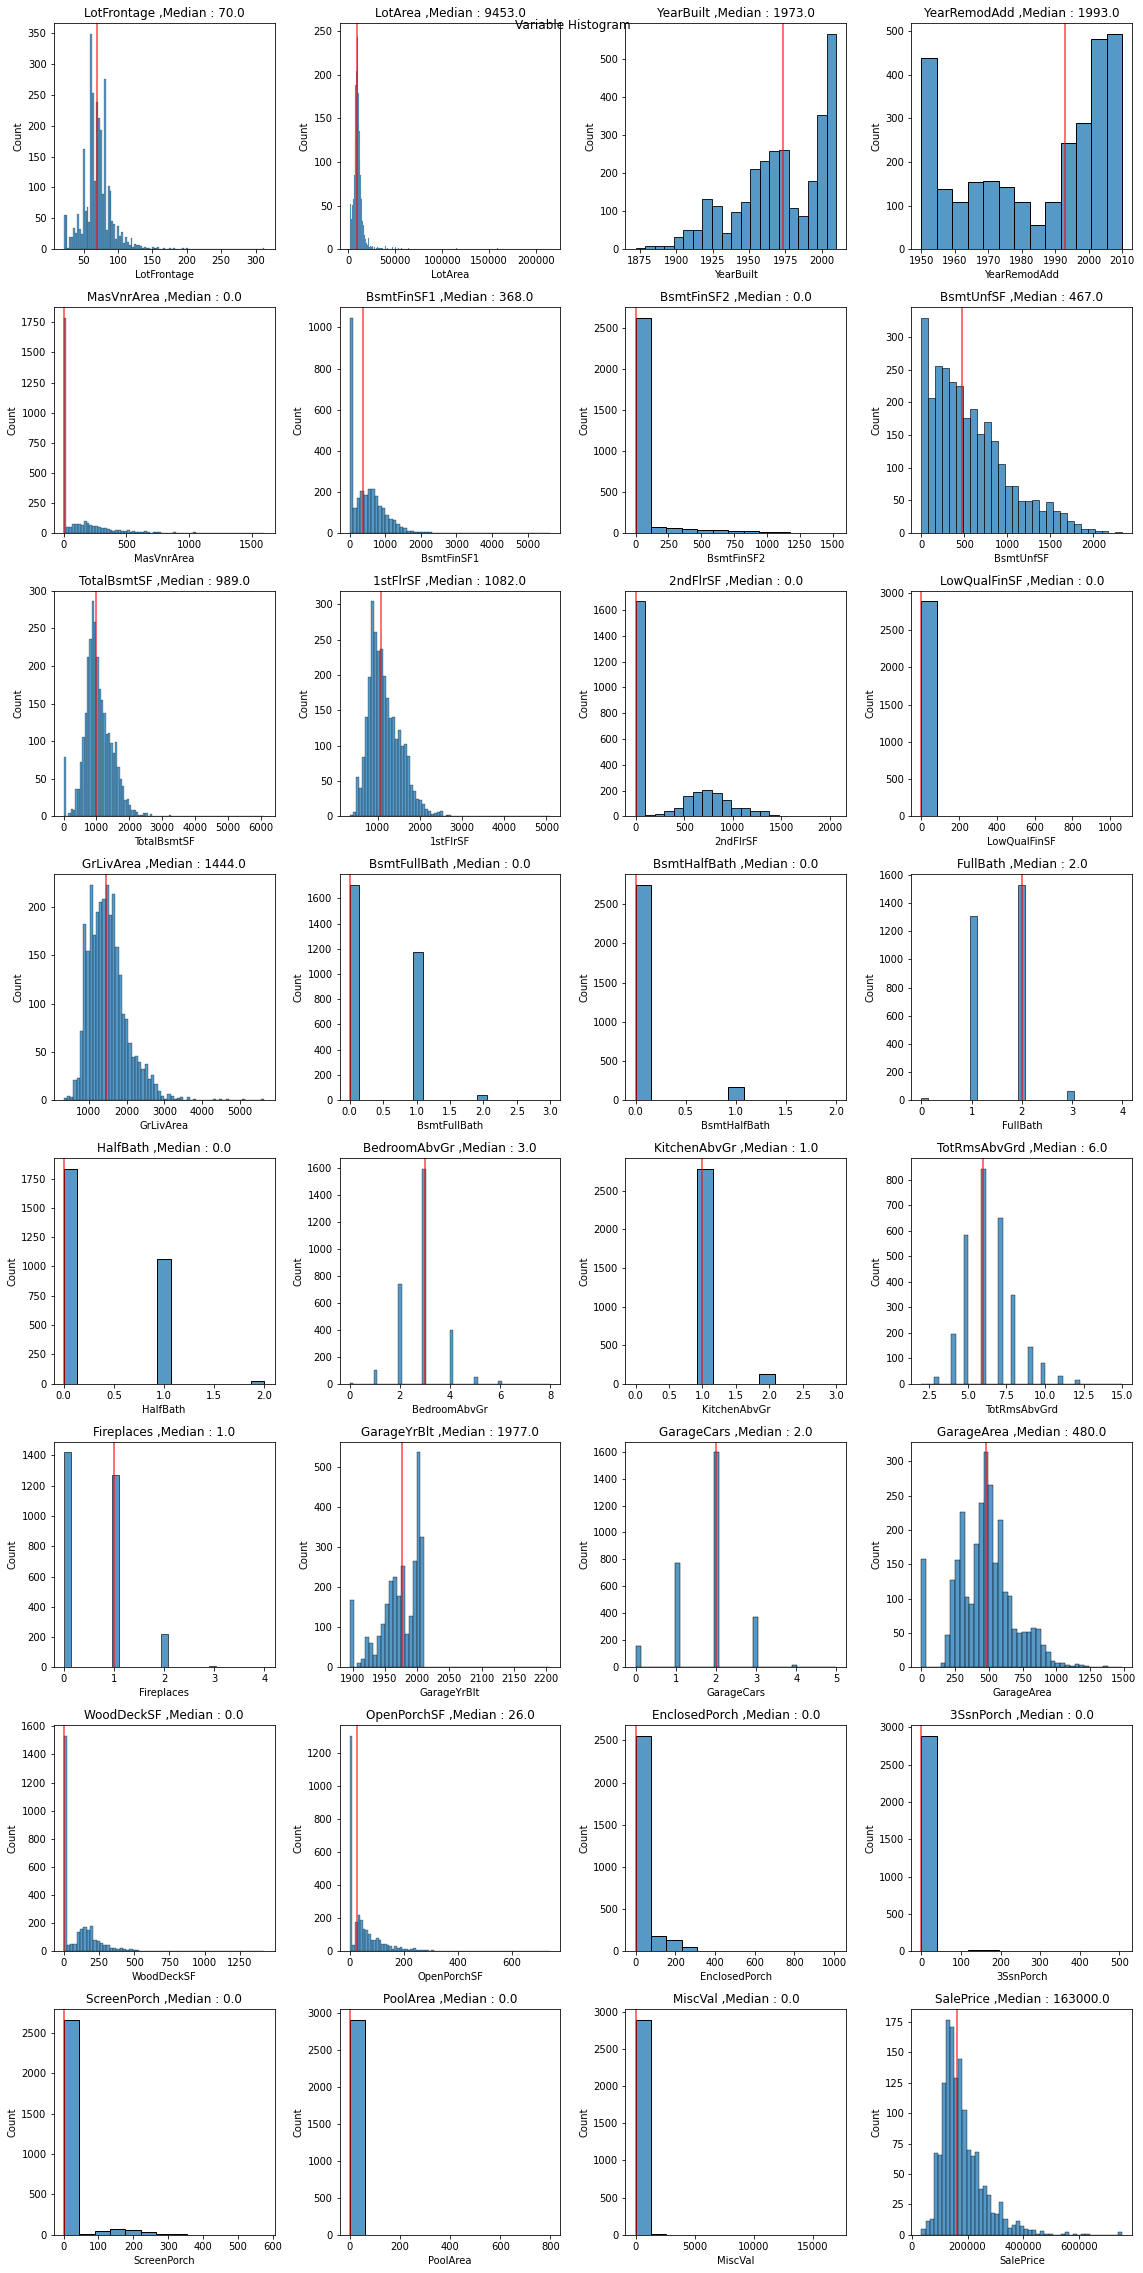

In [30]:
numerical_columns = list(df_all_prep.select_dtypes(exclude=['object']).columns)

def plot_numerical_histogram(df,x_cols=[],rows = 2,cell_size = 4):
    size = len(x_cols)
    cols = size // rows
    fig,axes = plt.subplots(rows,cols,figsize=(cols * cell_size, rows * cell_size))
    fig.suptitle("Variable Histogram")
    for i,axe in enumerate(axes.flatten()):
        if(i < size):
            sns.histplot(df[x_cols[i]],ax=axe)
            median = df[x_cols[i]].median()
            axe.set_title(x_cols[i] + f' ,Median : {median:0.1f}')
            axe.axvline(median, color ='red',lw=2, alpha = 0.55)
        else:
            print('subplots > n of columns, change n of rows')
            break 
    plt.tight_layout()
    plt.show()
plot_numerical_histogram(df_all_prep,numerical_columns,rows=8)

* from the above some linear relationshipscan be further improved by proper handling to outliers and skewed distributions.
* [LotFrontage > ~250] ,[MasVnrArea > ~1500] , [BsmtFinSF1 > 5000],[TotalBsmtSF > 5000] , [1stFlrSF > 4000]
* [GrLivArea > ~5000]
* another idea about summing total basement area, total floor area , OpenPorch+EnclosedPorch..etc is good to counter the problem of zeros which impact the linearity. 

* dropping outliers (from the train data)

In [31]:
drop_indices= set(  df_train_prep[df_train_prep['LotFrontage'] >250].index.tolist()+ 
        df_train_prep[df_train_prep['MasVnrArea'] > 1500].index.tolist() +
        df_train_prep[df_train_prep['BsmtFinSF1'] > 5000].index.tolist() + 
        df_train_prep[df_train_prep['TotalBsmtSF'] > 5000].index.tolist() + 
        df_train_prep[df_train_prep['1stFlrSF'] > 4000].index.tolist()+
        df_train_prep[df_train_prep['GrLivArea'] > 5000].index.tolist())
print('Total Dropped : ' ,len(drop_indices))
df_train_prep_no = df_train_prep.drop(index=drop_indices, inplace = False)

Total Dropped :  3


* fixing skeweness

In [32]:
#log transform skewed numeric features:
from scipy.stats import skew

df_train_prep_ns = df_train_prep_no.copy()
df_test_prep_ns = df_test_prep.copy()

numerical_columns = list(df_train_prep_no.select_dtypes(exclude=['object']).columns)

skewed_cols = df_train_prep_no[numerical_columns].apply(lambda x: skew(x.dropna()))  
skewed_cols = skewed_cols[skewed_cols > 0.75]
skewed_cols = skewed_cols.index

df_train_prep_ns[skewed_cols] = np.log1p(df_train_prep_no[skewed_cols])
df_test_prep_ns[skewed_cols] = np.log1p(df_test_prep[skewed_cols])

* adding basic features

In [33]:
#adding Helpful features
def totalAreaSum(df):
    return df.sum()

# train
new_feature_data_series(df_train_prep_ns,df_train_prep_ns,
                        ['1stFlrSF','2ndFlrSF','BsmtFinSF1','BsmtFinSF2'],totalAreaSum,'TotalAreaSF')

new_feature_data_series(df_train_prep_ns,df_train_prep_ns,
                        ['OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch'],totalAreaSum,'TotalPorchSF')

# test
new_feature_data_series(df_test_prep_ns,df_test_prep_ns,
                        ['1stFlrSF','2ndFlrSF','BsmtFinSF1','BsmtFinSF2'],totalAreaSum,'TotalAreaSF')
new_feature_data_series(df_test_prep_ns,df_test_prep_ns,
                        ['OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch'],totalAreaSum,'TotalPorchSF')

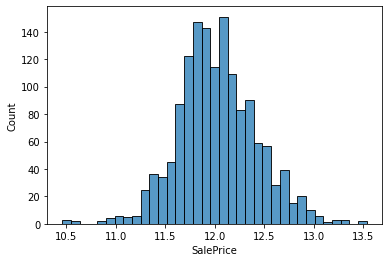

In [34]:
#check SalePrice after skewness
sns.histplot(data=df_train_prep_ns['SalePrice'])
plt.show()

---
#### Bivariate Exploration
* Exploring each variable and their relation to the target variable
    * Numerical Features we will use regression plots (~scatter plots with regression lines).
    * Categroical Features we will use bar or count plots.

##### Numerical Exploration

subplots < n of columns, change n of rows


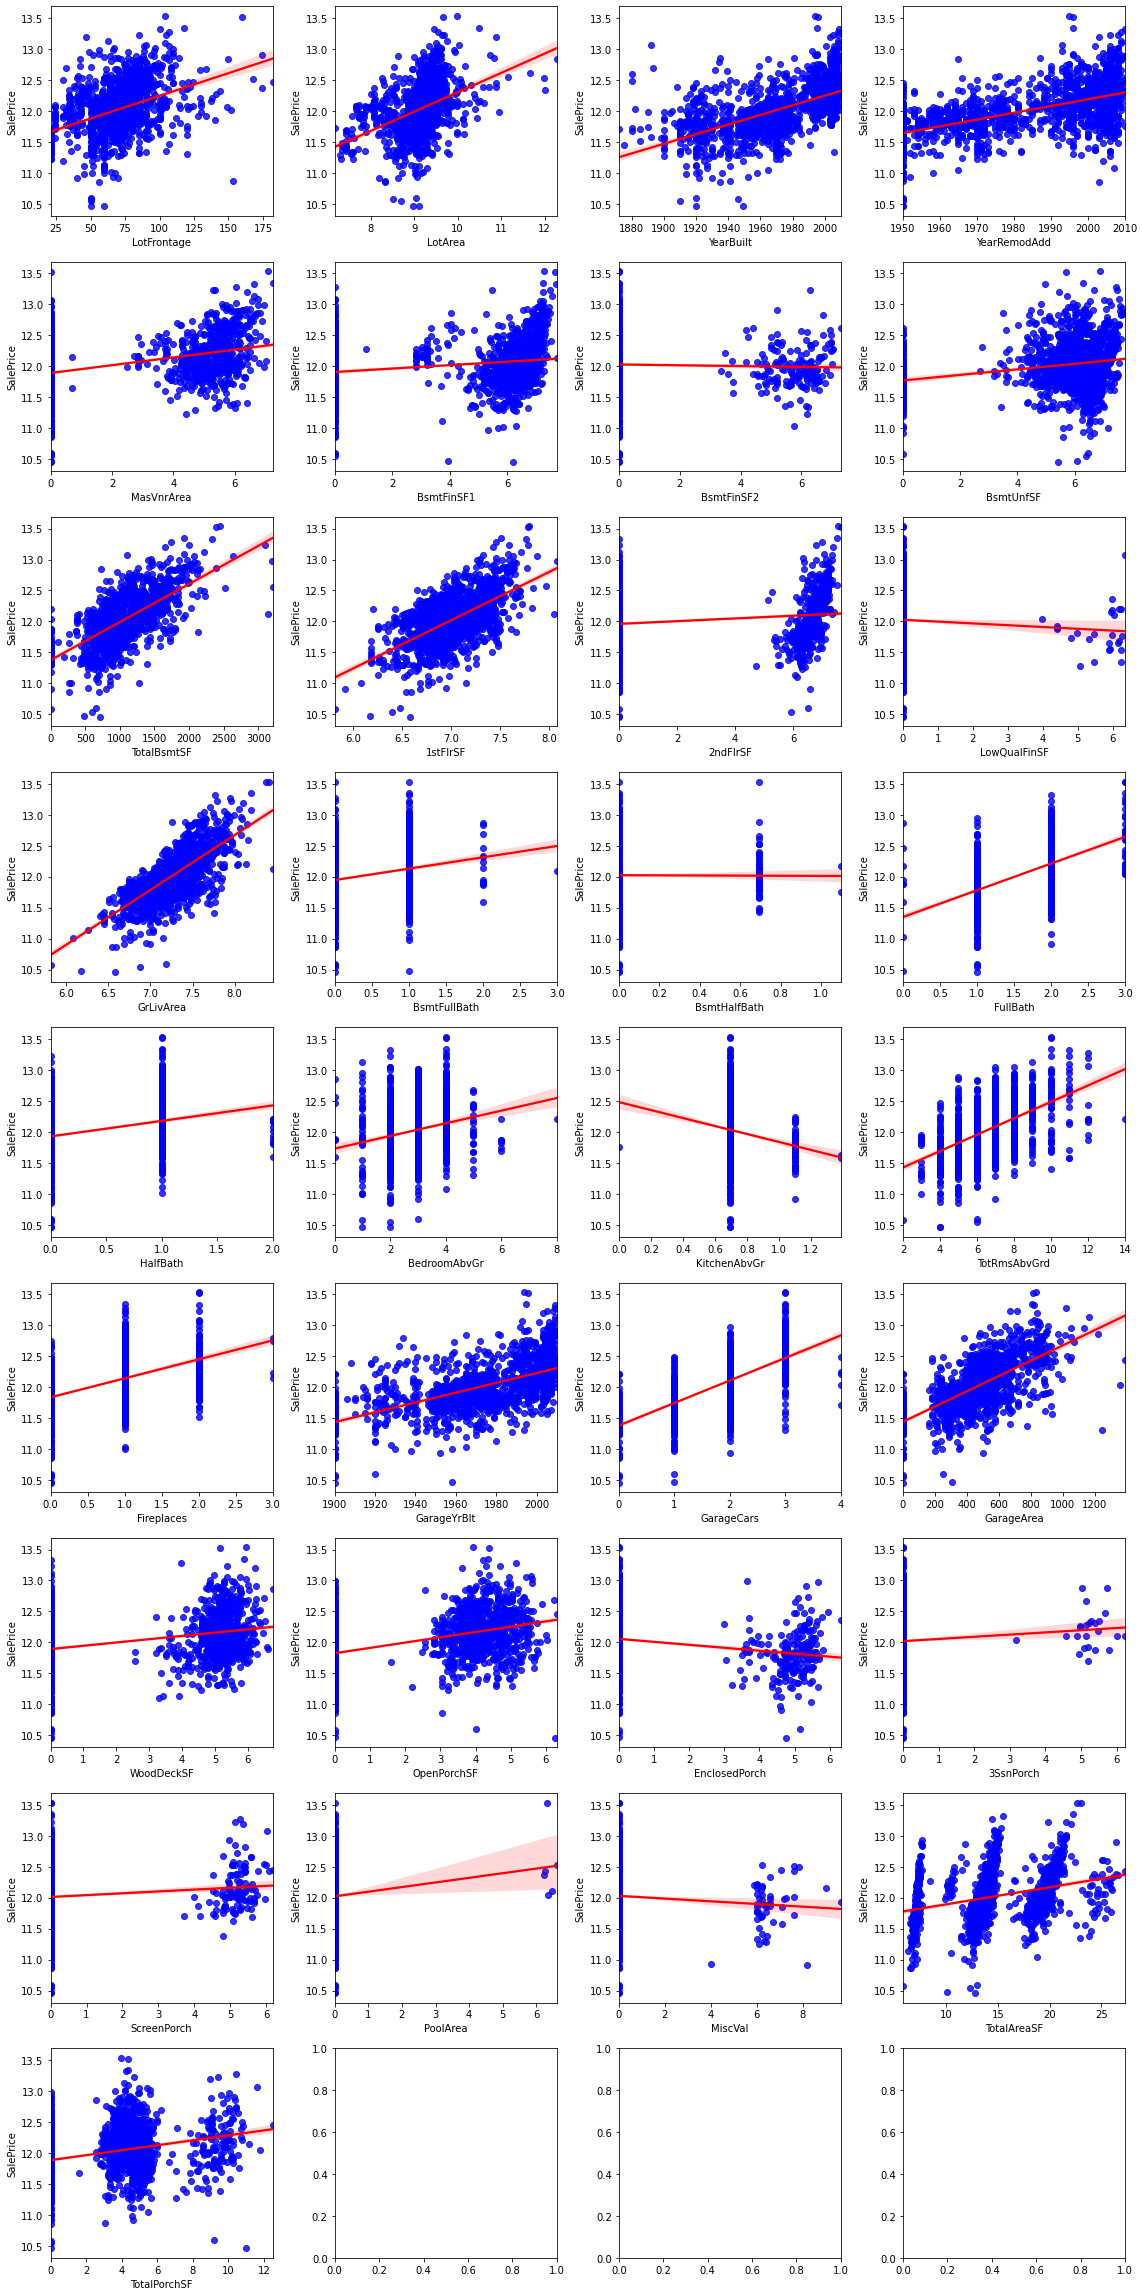

In [35]:
numerical_columns = list(df_train_prep_ns.drop('SalePrice',axis=1).select_dtypes(exclude=['object']).columns)

def plot_numerical_with_target(df,x_cols=[],target_col='SalePrice',rows = 2,cell_size = 4):
    size = len(x_cols)
    cols = (size) // (rows)
    fig,axes = plt.subplots(rows+1,cols,figsize=(cols * cell_size, rows * cell_size))
    
    if (size > cols * rows ):
        print('subplots < n of columns, change n of rows')
    for i,axe in enumerate(axes.flatten()):
        if(i < size):
            sns.regplot(data=df,x=x_cols[i],y=target_col,ax=axe,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
        else:
            #print('subplots > n of columns, change n of rows')
            break 
    #plt.suptitle("Sale Price vs Variable")
    plt.tight_layout()
    plt.show()
plot_numerical_with_target(df_train_prep_ns,numerical_columns,rows=8)

* most of the linear relationships benefited from handling outliers and skewness 

##### Categorical Exploration

subplots < n of columns, change n of rows


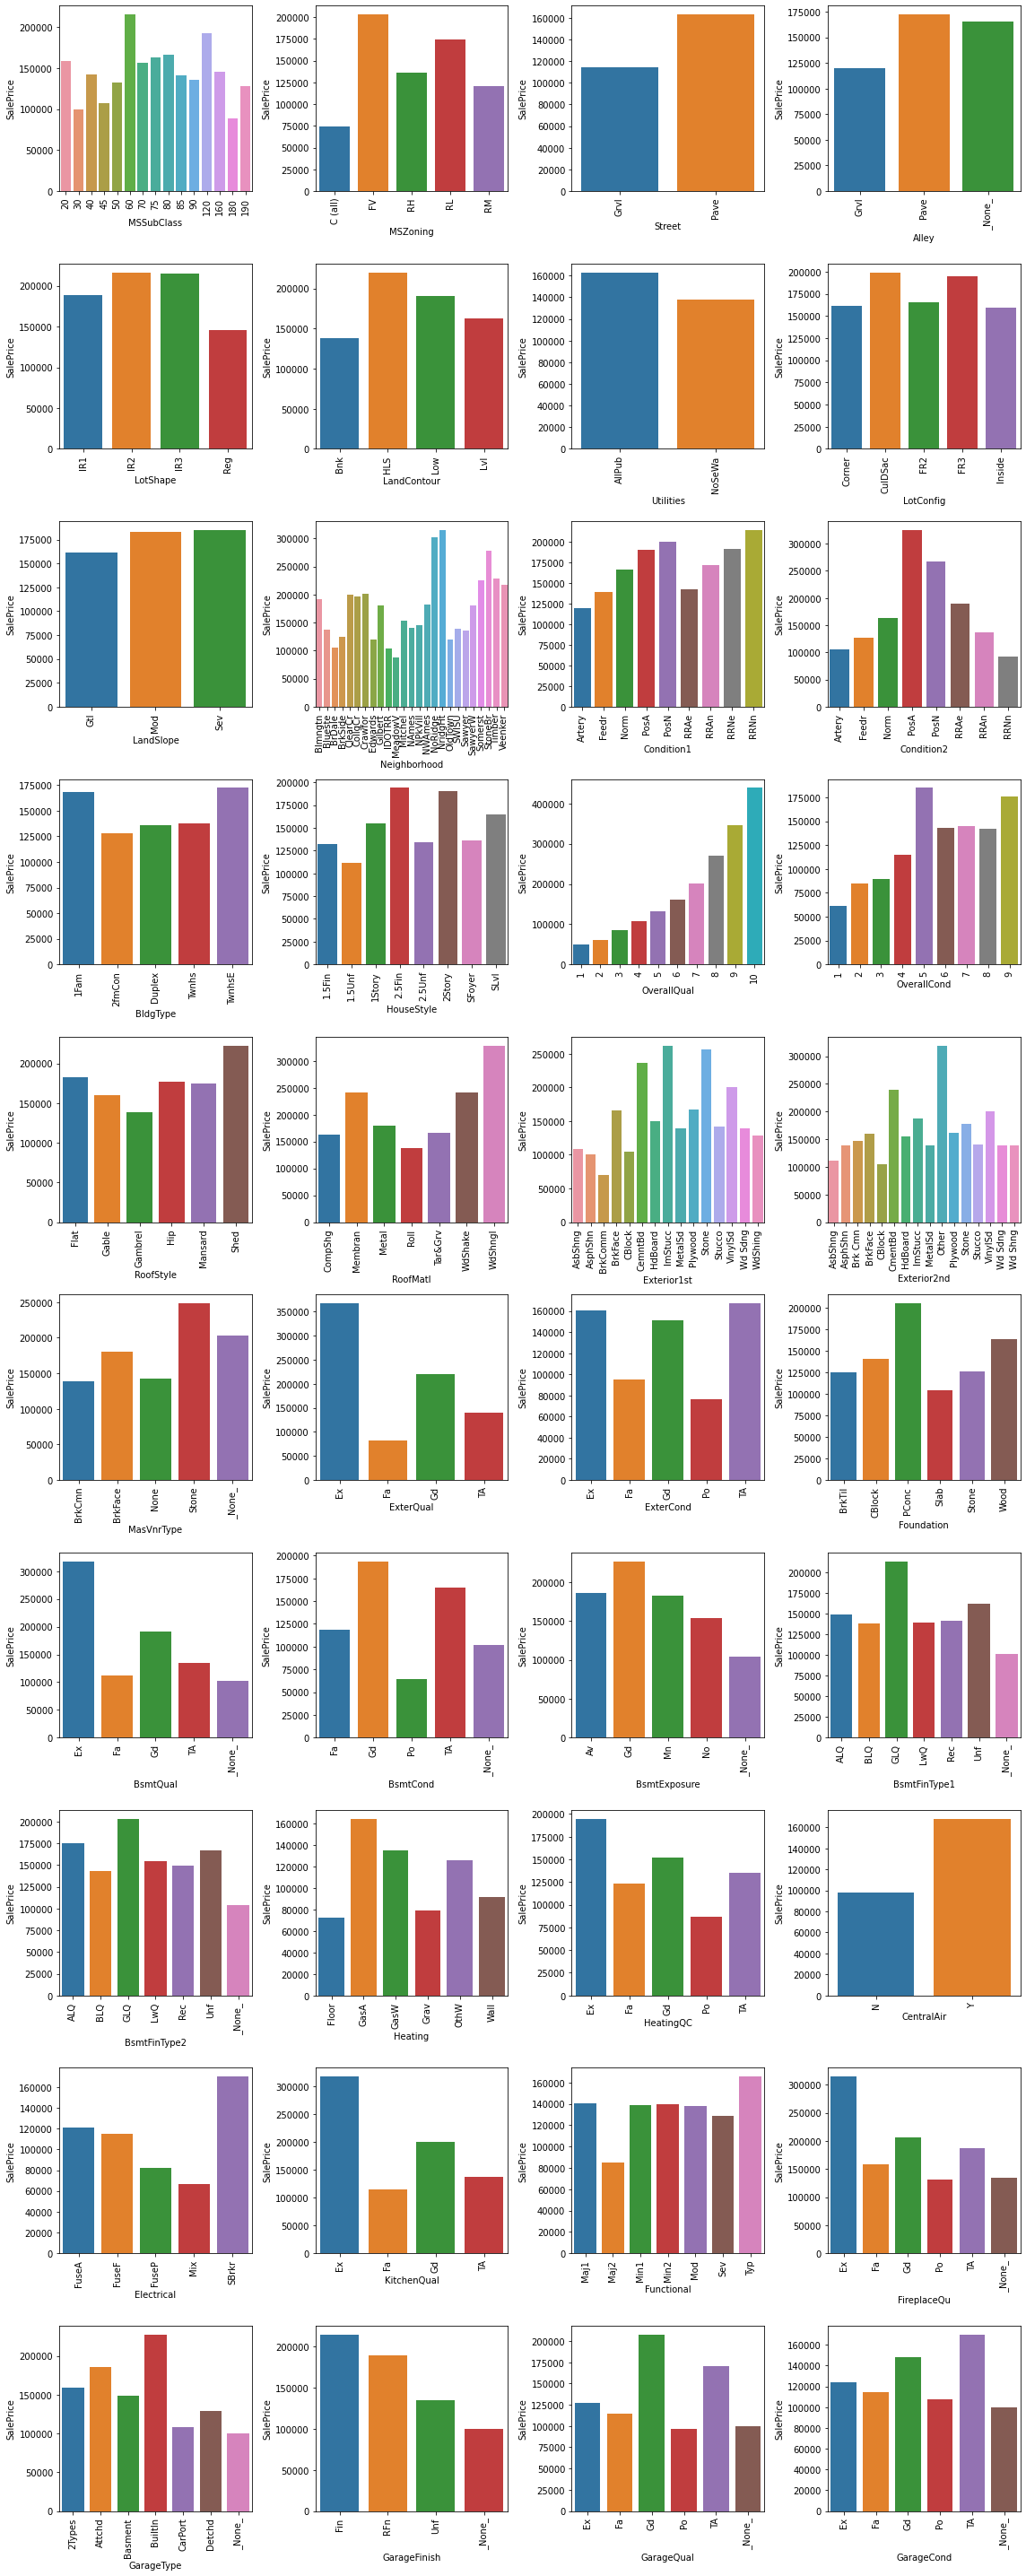

In [36]:
#---- Categorical Relations to Sale Price
categorical_columns = list(df_train_prep_ns.select_dtypes(include=['object']).columns)

def plot_categorical_with_target(df,cat_cols=[],target_col='y',rows = 2,cell_size = 4):
    size = len(cat_cols)
    cols = size // rows
    fig,axes = plt.subplots(rows,cols,figsize=(cols * cell_size, rows * cell_size))
    if (size > cols * rows ):
        print('subplots < n of columns, change n of rows')
    for i,axe in enumerate(axes.flatten()):
        if(i < len(cat_cols)):
            df_g = df.groupby(cat_cols[i],as_index =False)[[target_col]].median()
            #--- restored to real original price for better visualization of the difference
            df_g[target_col] = np.exp(df_g[target_col]) 

            sns.barplot(data=df_g,x=cat_cols[i],y=target_col,ax=axe)
            axe.tick_params(axis='x',labelrotation = 90)

            
        else:
            #print('subplots > n of columns, change n of rows')
            break
    plt.tight_layout()
    plt.show()

plot_categorical_with_target(df_train_prep_ns,categorical_columns,target_col='SalePrice',rows=10)

---
#### I will use ordinal encoding technique for features that has some order depending on the data description text file  and using the  mean of the sale price 
* like (Fence quality, Pool quality,GarageCond: Garage condition ..)
* other options like onehot encoding will be used for the rest.

In [37]:
df_train_prep_c = df_train_prep_ns.copy() 
df_test_prep_c = df_test_prep_ns.copy() #-- we will use same categorical info from train to test...

# categorical_columns = list(df_train_prep_c.select_dtypes(include=['object']).columns)
selected_ordinal_features = ['ExterQual','ExterCond','BsmtQual','BsmtCond','Condition1','Condition2',
                             'HeatingQC','KitchenQual','FireplaceQu','GarageQual',
                            'GarageCond','PoolQC','Fence','SaleCondition','OverallQual']

def encode_ordinal_byPrices(df_train,df_test,df_train_original,df_test_original,cat_cols=[],target_col='y'):
    for col in cat_cols:
        df_g = df_train_original.groupby(col,as_index =False)[[target_col]].median() #get mean
        df_g[target_col] = np.exp(df_g[target_col]) 
        list_of_order = df_g.sort_values(by=target_col,ignore_index=True)[col].tolist() #--sorted from min to max
        encode_data_series(df_train,df_train_original,[col],list_of_order,list(range(len(list_of_order)))) #encoded by order
        encode_data_series(df_test,df_test_original,[col],list_of_order,list(range(len(list_of_order)))) #encoded by order
        
encode_ordinal_byPrices(df_train_prep_c,df_test_prep_c,df_train_prep_ns,df_test_prep_ns,selected_ordinal_features,target_col='SalePrice')

* Visualize the results ...

subplots < n of columns, change n of rows


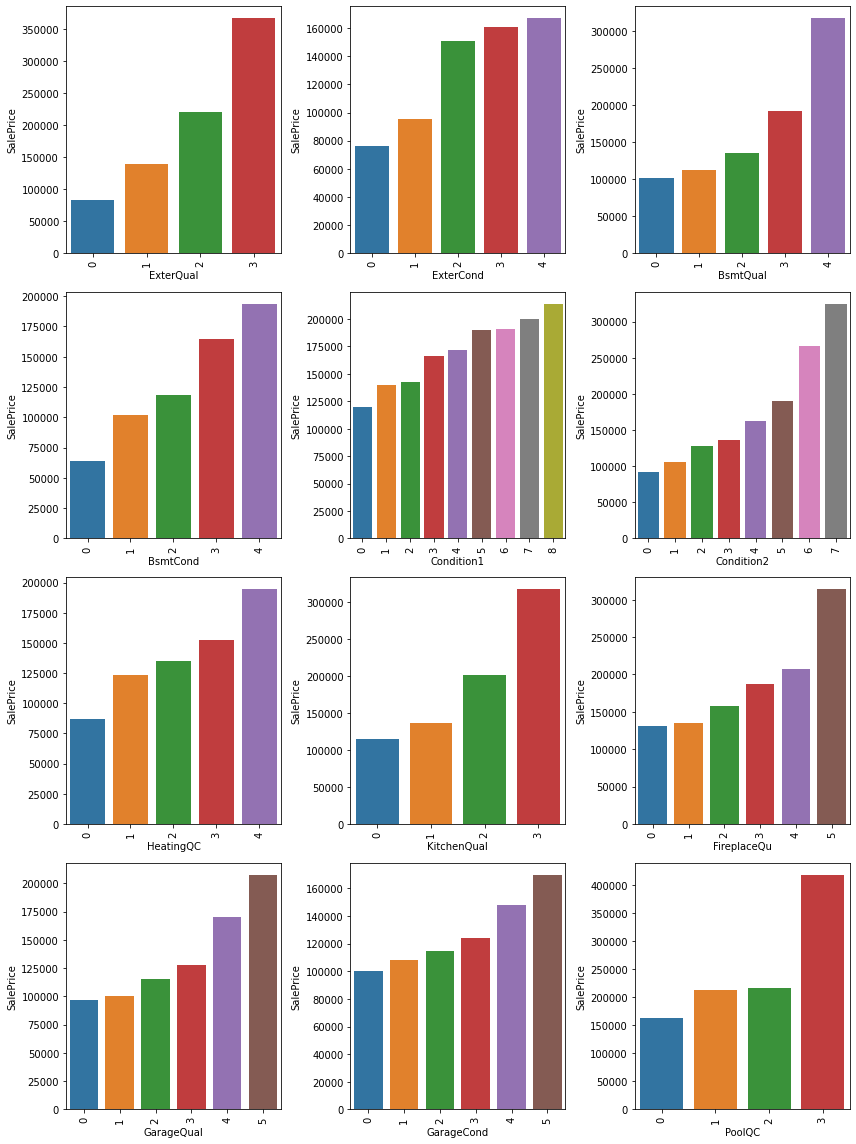

In [38]:
plot_categorical_with_target(df_train_prep_c,selected_ordinal_features,target_col='SalePrice',rows=4)

* Great! now we have almost all the Variables encoded and fixed their linear relationship with Target

In [39]:
# ~ one hot encode the rest..
df_train_prep_f = pd.get_dummies(df_train_prep_c)
df_test_prep_f  = pd.get_dummies(df_test_prep_c)

In [40]:
#-- some features has other options so i will drop them for now
df_train_prep_f.columns.difference(df_test_prep_f.columns)

Index(['Electrical_Mix', 'Exterior1st_ImStucc', 'Exterior1st_Stone',
       'Exterior2nd_Other', 'Heating_Floor', 'Heating_OthW',
       'HouseStyle_2.5Fin', 'MiscFeature_TenC', 'RoofMatl_Membran',
       'RoofMatl_Metal', 'RoofMatl_Roll', 'Utilities_NoSeWa'],
      dtype='object')

In [41]:
df_train_prep_f = df_train_prep_f.drop(axis=1,columns=df_train_prep_f.columns.difference(df_test_prep_f.columns) )

In [42]:
print('Difference : ' ,len(df_train_prep_f.columns.difference(df_test_prep_f.columns)))

Difference :  0


---
### Multivariate Exploration
##### Correlations

In [43]:
df_corr = df_train_prep_f.corr()
df_sorted_corr = df_corr['SalePrice'].abs().sort_values(ascending=False)
correlation_threshold =  0.5 #for visualization
high_corr_cols = df_sorted_corr[df_sorted_corr > correlation_threshold].index.tolist()

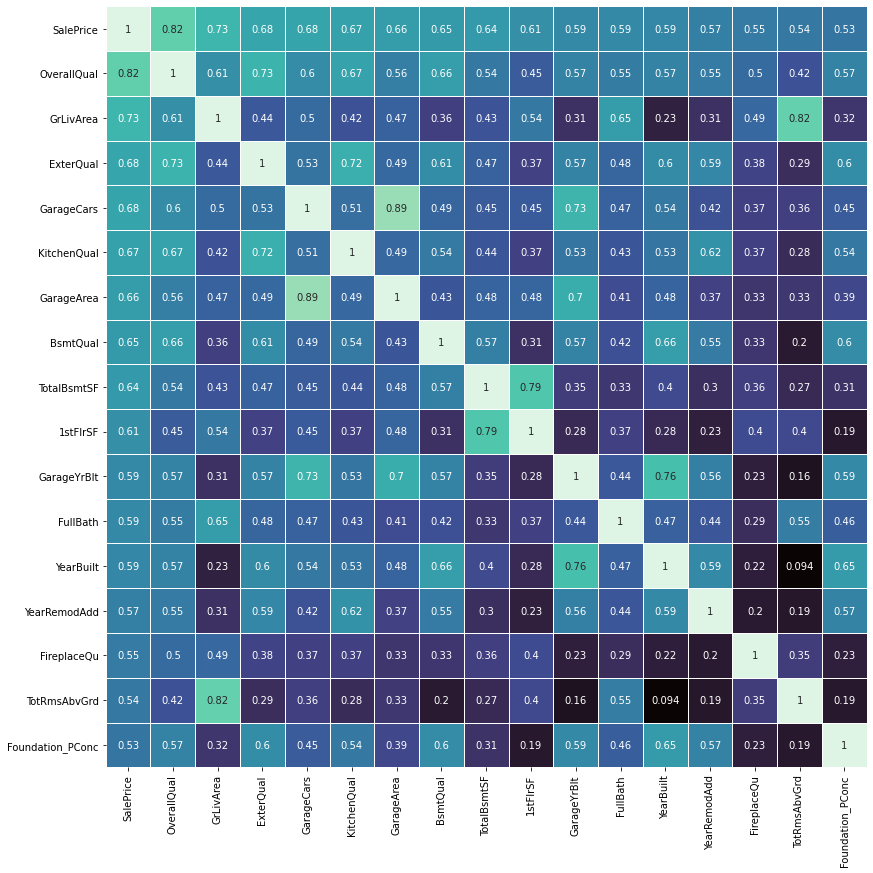

In [44]:
plt.figure(figsize=(14,14))
sns.heatmap(df_corr.loc[high_corr_cols,high_corr_cols],annot=True,square=True,linewidths=1,cmap='mako',cbar=False)
plt.show()

* i may add interesting features later .. lets see model performance :)

---
# Model Training

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import make_scorer

In [46]:
# select features based on correlations
df_corr = df_train_prep_f.corr()
df_sorted_corr = df_corr['SalePrice'].abs().sort_values(ascending=False)[1:]
correlation_threshold =  0.15
selected_corr_cols = df_sorted_corr[df_sorted_corr > correlation_threshold].index.tolist()

exclude_lst = []

selected_features = [col for col in selected_corr_cols if col not in exclude_lst]

train = df_train_prep_f.copy()
X = train[selected_features]
y = train["SalePrice"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

#trying poly feature , working without it now..
poly_features = PolynomialFeatures(degree=1)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

### Linear Regression

In [47]:
lreg = LinearRegression()
lreg.fit(X_train_poly,y_train)
y_train_predict = lreg.predict(X_train_poly)
y_test_predict = lreg.predict(X_test_poly)

y_train_predict[y_train_predict<0] = 0 
y_test_predict[y_test_predict<0] = 0 

## mse for logs
y_train_mse_error_log = mean_squared_error(y_train,y_train_predict)
y_test_mse_error_log = mean_squared_error(y_test,y_test_predict)

y_train_mse_error = mean_squared_error(np.exp(y_train),np.exp(y_train_predict))
y_test_mse_error = mean_squared_error(np.exp(y_test),np.exp(y_test_predict))

y_train_r2 = r2_score(y_train,y_train_predict)
y_test_r2 = r2_score(y_test,y_test_predict)

print('RMSE(Logs) : ')
print('\t Train : ',np.sqrt(y_train_mse_error_log))
print('\t Test  : ',np.sqrt(y_test_mse_error_log))

print('RMSE : ')
print('\t Train : ',np.sqrt(y_train_mse_error))
print('\t Test  : ',np.sqrt(y_test_mse_error))

print('R2 % : ')
print('\t Train : ',y_train_r2*100)
print('\t Test : ',y_test_r2*100)

RMSE(Logs) : 
	 Train :  0.1090473495476041
	 Test  :  0.1262635899995706
RMSE : 
	 Train :  24179.343507245383
	 Test  :  25873.711835746086
R2 % : 
	 Train :  92.28976974428305
	 Test :  91.15700213122673


### Ridge CV Regularization

In [48]:
cv = KFold(n_splits=7, random_state=1,shuffle=True)
lreg = RidgeCV(alphas=list(np.arange(0,1,0.01)),normalize=True,scoring='neg_mean_squared_error' ,cv=cv)
lreg.fit(X_train_poly,y_train)
y_train_predict = lreg.predict(X_train_poly)
y_test_predict = lreg.predict(X_test_poly)

y_train_predict[y_train_predict<0] = 0 
y_test_predict[y_test_predict<0] = 0 

## mse for logs
y_train_mse_error_log = mean_squared_error(y_train,y_train_predict)
y_test_mse_error_log = mean_squared_error(y_test,y_test_predict)

y_train_mse_error = mean_squared_error(np.exp(y_train),np.exp(y_train_predict))
y_test_mse_error = mean_squared_error(np.exp(y_test),np.exp(y_test_predict))

y_train_r2 = r2_score(y_train,y_train_predict)
y_test_r2 = r2_score(y_test,y_test_predict)

print('RMSE(Logs) : ')
print('\t Train : ',np.sqrt(y_train_mse_error_log))
print('\t Test : ',np.sqrt(y_test_mse_error_log))

print('RMSE : ')
print('\t Train : ',np.sqrt(y_train_mse_error))
print('\t Test : ',np.sqrt(y_test_mse_error))

print('R2 % : ')
print('\t Train : ',y_train_r2*100 )
print('\t Test : ',y_test_r2*100 )

RMSE(Logs) : 
	 Train :  0.11035366651788707
	 Test :  0.1260487841396005
RMSE : 
	 Train :  24654.11603417025
	 Test :  25914.034805083098
R2 % : 
	 Train :  92.10393610904006
	 Test :  91.18706482747456


In [49]:
lreg.alpha_

0.05

In [50]:
lreg = Ridge(alpha=0.05,  normalize=True)
lreg.fit(X_train_poly,y_train)
y_train_predict = lreg.predict(X_train_poly)
y_test_predict = lreg.predict(X_test_poly)

y_train_predict[y_train_predict<0] = 0 
y_test_predict[y_test_predict<0] = 0 

## mse for logs
y_train_mse_error_log = mean_squared_error(y_train,y_train_predict)
y_test_mse_error_log = mean_squared_error(y_test,y_test_predict)

y_train_mse_error = mean_squared_error(np.exp(y_train),np.exp(y_train_predict))
y_test_mse_error = mean_squared_error(np.exp(y_test),np.exp(y_test_predict))

y_train_r2 = r2_score(y_train,y_train_predict)
y_test_r2 = r2_score(y_test,y_test_predict)

print('RMSE(Logs) : ')
print('\t Train : ',np.sqrt(y_train_mse_error_log))
print('\t Test : ',np.sqrt(y_test_mse_error_log))

print('RMSE : ')
print('\t Train : ',np.sqrt(y_train_mse_error))
print('\t Test : ',np.sqrt(y_test_mse_error))

print('R2 % : ')
print('\t Train : ',y_train_r2*100 )
print('\t Test : ',y_test_r2*100 )

RMSE(Logs) : 
	 Train :  0.11035366651788707
	 Test :  0.1260487841396005
RMSE : 
	 Train :  24654.11603417025
	 Test :  25914.034805083098
R2 % : 
	 Train :  92.10393610904006
	 Test :  91.18706482747456


### Cross Validation

In [51]:
#cv = RepeatedKFold(n_splits=7,n_repeats=3, random_state=1)
cv = KFold(n_splits=10, random_state=1,shuffle=True)

scores = cross_val_score(lreg, X_train_poly,y_train,scoring='neg_mean_squared_error' ,cv=cv, verbose = 0)

print("RMSE(LOG) : ",np.mean(np.sqrt( -scores)) )

scoresACC = cross_val_score(lreg, X_train_poly,y_train,scoring='r2' ,cv=cv)
print('R2 : ' ,np.mean(scoresACC))

RMSE(LOG) :  0.11956454071261975
R2 :  0.9007658680027679


---
## Linear Regression Predictions

In [52]:
Kaggle_test = df_test_prep_f[selected_features]
Kaggle_test_poly = poly_features.transform(Kaggle_test)
predsX = lreg.predict(Kaggle_test_poly)
predsXexp = np.expm1(predsX)
predsXexp[-1:-10:-1]

array([220827.74958025, 121318.64996949, 169788.23656081,  86595.48849077,
        89319.34323627,  81388.95672222,  83296.80671798, 151548.49778781,
        81603.95840641])

In [53]:
df_test_prep_c['SalePrice'] = predsXexp
df_test_prep_c[["SalePrice"]].to_csv('submission472.csv', index=True)